In [ ]:
#  Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
%matplotlib inline
import seaborn as sns
sns.set()

In [128]:
# Loading dataset
df=pd.read_csv('BostonHousing.csv')

In [ ]:
df.head()

##### Naming columns

In [ ]:

column=['Crime Rate','Residential Proportion','non-retail business acres/Town','Charles River','NO2 concentration',
        'Average Rooms/Dwelling','Prior Built Units Proportion', ' Distance to Employeent Centres','Radial Highways'
        ' Distance','ValueProperty/tax rate','Teacher/town','blacks/town','lower Status Percent','Median home price']
columns=column[:-1]
target='Median home price'

In [131]:
df.columns=column

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
# Checking Null values
df.isnull().sum()

### Creating Dependent (Y)and Independent Columns(X)

In [ ]:
X=df.drop(['Median home price'],axis=1)
Y=df[[target]]
Y.head()

### Checking Correlation Between columns

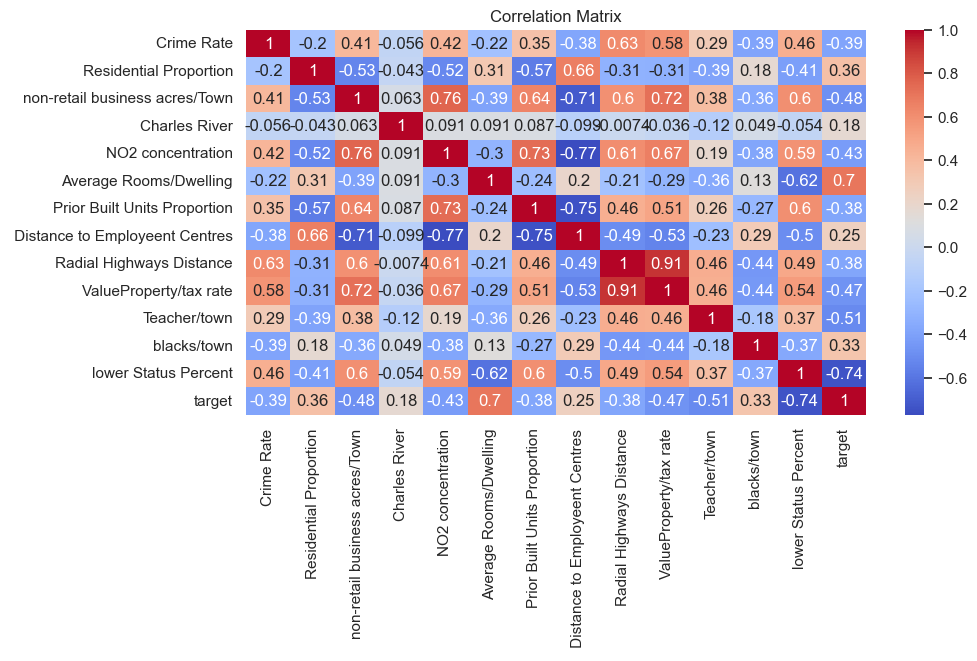

In [136]:
# Correlation of all features + target
df_all = X.copy()
df_all['target'] = Y

corr = df_all.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
print(Y.shape)
print(X.shape)

In [ ]:
# Filling Null values
X.isnull().sum()
X['Average Rooms/Dwelling'].fillna(
    X['Average Rooms/Dwelling'].mean(),
    inplace=True)


## Normalization

In [ ]:
# Min Max Scalar
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_scaled_minmax=min_max_scaler.fit_transform(X)
X=pd.DataFrame(x_scaled_minmax , columns=columns)
X.head()

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, test_size=0.30,random_state=25,shuffle=True)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

### Training Model, Predicting & Testing

In [141]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
print(xtrain.isna().sum())
print(xtrain.shape)
print(xtrain.dtypes)


In [145]:
model.fit(xtrain,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


#### Predicting Values from Model

In [146]:
pred=model.predict(xtest)
pred2=model.predict(xtrain)

In [147]:
model.coef_

array([[-10.25213823,   5.05599427,   0.76774744,   0.73285455,
         -9.23052789,  20.98838387,  -0.45286324, -16.99837522,
          8.46029618,  -8.73154927,  -9.29617848,   2.95139505,
        -16.64980758]])

In [148]:
model.intercept_

array([27.44809564])

### Checking r2 by sklearn metric
r2 is a statistic that will give some information about the goodness of fit of a model. In linear regression , the R2 coefficeint of determination is a statistical measure of how well the regression predictions approximate the real data points

In [149]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [150]:
train_r2=r2_score(ytrain,pred2)

In [151]:
print('R2 score for testing : ',test_r2)
print('R2 score for Training : ', train_r2)

R2 score for testing :  0.7120610333156985
R2 score for Training :  0.7431646527497848


In [152]:
def adjusted_r2(n,p,test_r2):
    return 1-(1-test_r2)*(n-1)/(n-p-1)
n=xtest.shape[0]
p=xtest.shape[1]
print('The adjusted r2 score of x test:',adjusted_r2(n,p,test_r2))


The adjusted r2 score of x test: 0.6849363480483368


In [153]:
def adjusted_r2(n,p,train_r2):
    return 1-(1-train_r2)*(n-1)/(n-p-1)
n=xtrain.shape[0]
p=xtrain.shape[1]
print('The adjusted r2 score of x train:',adjusted_r2(n,p,train_r2))


The adjusted r2 score of x train: 0.7333444777078648


In [ ]:
#  Checking R2 score for every column
r_2=[]
for i in range(1,xtest.shape[-1]+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i],ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

In [ ]:
r_2

Text(0, 0.5, 'r_2 score')

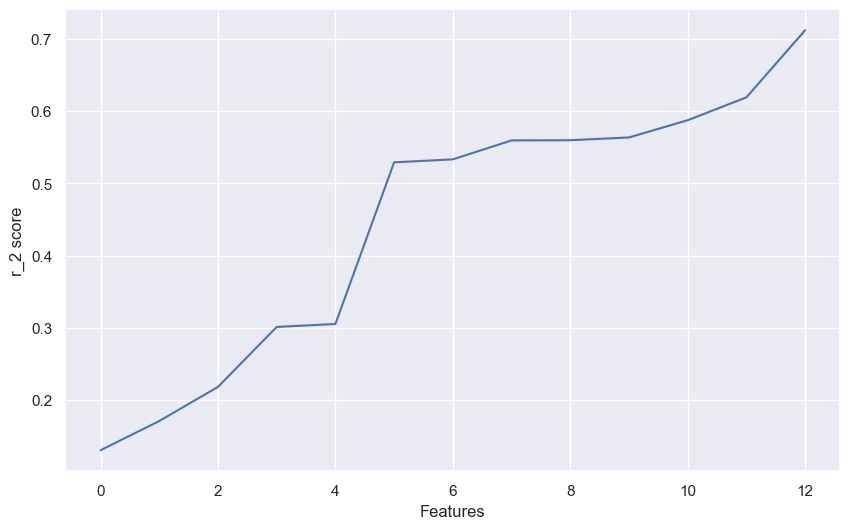

In [180]:
plt.figure(figsize=(10,6))
sns.lineplot(data=r_2)
plt.xlabel('Features')
plt.ylabel('r_2 score')

#### Creating Residual Plot

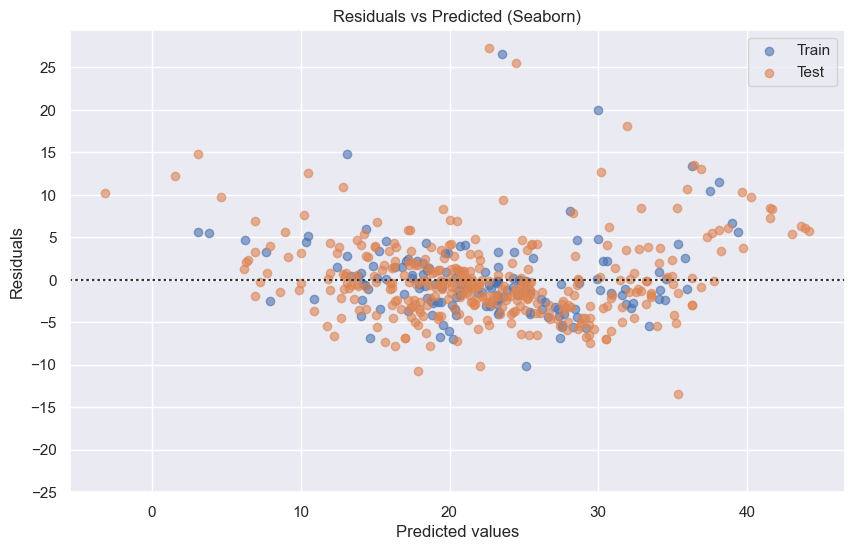

In [181]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.residplot(x=pred,
               y=ytest.values,
                lowess=False,
                scatter_kws={'alpha':0.6},
                label='Train')
sns.residplot(x=pred2,
             y=ytrain.values,
             scatter_kws={'alpha':0.6},
             label='Test')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Seaborn)")
plt.yticks(np.arange(-25, 30, 5))
# plt.xticks(np.arange(0,10,15,20,25,30,35,40))
plt.legend()
plt.show()


#### Recursive Feature Elimination

In [158]:
from sklearn.feature_selection import RFE
lrm=LinearRegression()

In [159]:
# recursive feature elimination with cross validation,using r- squared as metric
rfe=RFE( estimator=lrm , step=3 , n_features_to_select=None)
rfe.fit(X , Y.values)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",LinearRegression()
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",None
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",3
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [160]:
rfe.ranking_

array([1, 3, 4, 4, 1, 1, 4, 1, 2, 3, 1, 3, 1])

In [ ]:
X.columns

In [162]:
rfe.support_

array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True, False,  True])

In [163]:
feature_name=np.array(columns)

In [ ]:
list(feature_name[rfe.support_])

In [165]:
# print the optimal number of feature
print('Optimal number of features :%d' % rfe.n_features_)
feature_col_selected=list((feature_name)[rfe.support_])
print('Feature selected : '+ str(feature_col_selected))

Optimal number of features :6
Feature selected : [np.str_('Crime Rate'), np.str_('NO2 concentration'), np.str_('Average Rooms/Dwelling'), np.str_(' Distance to Employeent Centres'), np.str_('Teacher/town'), np.str_('lower Status Percent')]


In [166]:
xtrain_new=xtrain[list(feature_name[rfe.support_])]
xtest_new=xtest[list(feature_name[rfe.support_])]


In [ ]:
print(xtrain_new.shape)
print(xtest_new.shape)

#### RFE for x train

In [169]:
lm2=LinearRegression()
lm2.fit(xtrain_new,ytrain)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [170]:
pred_new=lm2.predict(xtest_new)
pred_xtrain=lm2.predict(xtrain_new)

In [171]:
# printing r2 score
print('The R-squared(r2) value is {0:0.4f}: \n'.format( r2_score(ytest,pred_new)))
# printing r2 score
print('The R-squared(r2) value is {0:0.4f}: \n'.format( r2_score(ytrain,pred_xtrain)))



The R-squared(r2) value is 0.6785: 

The R-squared(r2) value is 0.7191: 



### Adjusted R2

In [172]:
print('The adjusted r2 score of x test new is :',adjusted_r2(n,p,r2_score(ytest,pred_new)))
print('The adjusted r2 score of x test new is :',adjusted_r2(n,p,r2_score(ytrain,pred_xtrain)))

The adjusted r2 score of x test new is : 0.6661616565078627
The adjusted r2 score of x test new is : 0.7083890898484992


### Cross Validation

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
scores=cross_val_score(lm2 , xtrain_new , ytrain , cv=5)
scores2=cross_val_score(lm2 , xtest_new , ytest , cv=5)

In [175]:
print('The score for x train new is :',scores)
print('The score for x test new is :',scores2)

The score for x train new is : [0.76934431 0.73020982 0.54693987 0.59885865 0.73903991]
The score for x test new is : [0.60210782 0.45809423 0.61987955 0.71973204 0.79498122]


In [176]:
print('The average score for x train new is :',scores.mean())
print('The average score for x test new is : ',scores2.mean())

The average score for x train new is : 0.6768785122311602
The average score for x test new is :  0.6389589702509759


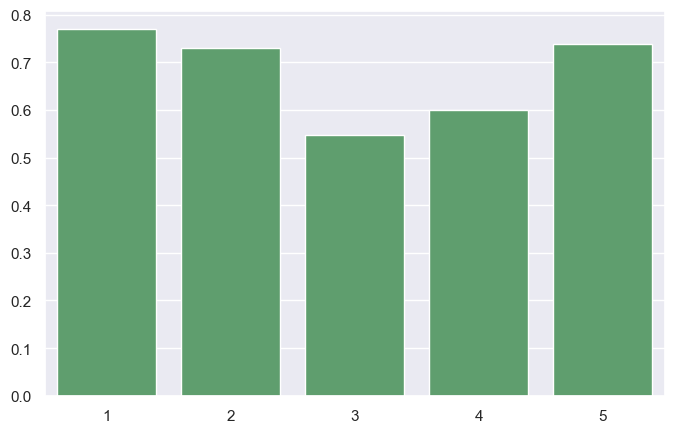

In [177]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores,color='g')
plt.show()